In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "8b470b618b32d04717d95d67a3997c16"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country
                          })

    # If an error is experienced, skip the city
    except:
        print("Ooops, the city can not be found!")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Thats the end of the list      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=provideniya
Processing Record 2 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=vaini
Processing Record 3 of Set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sao%20filipe
Processing Record 4 of Set 1 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=saint%20george
Processing Record 5 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=hermanus
Processing Record 6 of Set 1 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=port%20hedland
Pr

Processing Record 3 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=bluff
Processing Record 4 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tiksi
Processing Record 5 of Set 2 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=isangel
Processing Record 6 of Set 2 | vrangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=vrangel
Processing Record 7 of Set 2 | akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=akdepe
Processing Record 8 of Set 2 | caltagirone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=caltagirone
Processing Record 9 of Set 2 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 7 of Set 3 | buenos aires
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=buenos%20aires
Processing Record 8 of Set 3 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=berlevag
Processing Record 9 of Set 3 | verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=verkhnyaya%20inta
Processing Record 10 of Set 3 | trifos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=trifos
Ooops, the city can not be found!
Processing Record 11 of Set 3 | naivasha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=naivasha
Processing Record 12 of Set 3 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=port%20macquarie
Processing Reco

Processing Record 10 of Set 4 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=samusu
Ooops, the city can not be found!
Processing Record 11 of Set 4 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=xining
Processing Record 12 of Set 4 | konstantinovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=konstantinovka
Processing Record 13 of Set 4 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=puerto%20ayora
Processing Record 14 of Set 4 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sterling
Processing Record 15 of Set 4 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=saleaula
Ooops, the city can not be found!


Processing Record 12 of Set 5 | reconquista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=reconquista
Processing Record 13 of Set 5 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=aksarka
Processing Record 14 of Set 5 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=codrington
Processing Record 15 of Set 5 | kirkwall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=kirkwall
Processing Record 16 of Set 5 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=poum
Processing Record 17 of Set 5 | minas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=minas
Processing Record 18 of Set 5 | zhigansk
http://api.openweathermap.org/data/2.5/weather?

Processing Record 15 of Set 6 | sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sumbe
Processing Record 16 of Set 6 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sao%20felix%20do%20xingu
Processing Record 17 of Set 6 | varzea da palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=varzea%20da%20palma
Processing Record 18 of Set 6 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=leningradskiy
Processing Record 19 of Set 6 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=mayumba
Processing Record 20 of Set 6 | harnosand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=harnosand
Processing Record 21 of Set 6 | ib

Processing Record 18 of Set 7 | tres arroyos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tres%20arroyos
Processing Record 19 of Set 7 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=pisco
Processing Record 20 of Set 7 | villa guerrero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=villa%20guerrero
Processing Record 21 of Set 7 | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sambava
Processing Record 22 of Set 7 | tarudant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tarudant
Ooops, the city can not be found!
Processing Record 23 of Set 7 | praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=praya
Processing Record 24 of Set 7 | turins

Processing Record 20 of Set 8 | lukovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=lukovetskiy
Processing Record 21 of Set 8 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=attawapiskat
Ooops, the city can not be found!
Processing Record 22 of Set 8 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=japura
Processing Record 23 of Set 8 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=narsaq
Processing Record 24 of Set 8 | pio xii
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=pio%20xii
Processing Record 25 of Set 8 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tual
Processing Record 26 of Set 8 | ayagoz
http://api.

Ooops, the city can not be found!
Processing Record 23 of Set 9 | satitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=satitoa
Ooops, the city can not be found!
Processing Record 24 of Set 9 | finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=finnsnes
Processing Record 25 of Set 9 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=olinda
Processing Record 26 of Set 9 | rakiv lis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=rakiv%20lis
Processing Record 27 of Set 9 | boma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=boma
Processing Record 28 of Set 9 | tocantinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tocantinopolis
Ooops, the c

Processing Record 26 of Set 10 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=torbay
Processing Record 27 of Set 10 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=kudahuvadhoo
Processing Record 28 of Set 10 | zhumadian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=zhumadian
Processing Record 29 of Set 10 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sobolevo
Processing Record 30 of Set 10 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=mys%20shmidta
Ooops, the city can not be found!
Processing Record 31 of Set 10 | san angelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=san%20angelo
Processing Record 32 o

Processing Record 29 of Set 11 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=walvis%20bay
Processing Record 30 of Set 11 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=grand%20river%20south%20east
Ooops, the city can not be found!
Processing Record 31 of Set 11 | nizhniy lomov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=nizhniy%20lomov
Processing Record 32 of Set 11 | tlaxco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tlaxco
Processing Record 33 of Set 11 | pilar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=pilar
Processing Record 34 of Set 11 | nailsea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=nailsea
Pr

Processing Record 31 of Set 12 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=sistranda
Processing Record 32 of Set 12 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=tazovskiy
Processing Record 33 of Set 12 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=henties%20bay
Processing Record 34 of Set 12 | amudat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=amudat
Processing Record 35 of Set 12 | toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=toliary
Ooops, the city can not be found!
Processing Record 36 of Set 12 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b470b618b32d04717d95d67a3997c16&q=neuquen
Processing Record 37 of Set 12 | barra

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          550
Cloudiness    550
Country       550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,provideniya,90,RU,86,64.42,-173.23,39.20,11.18
1,vaini,80,IN,97,15.34,74.49,73.49,3.13
2,sao filipe,0,CV,94,14.90,-24.50,73.31,12.08
3,saint george,75,GR,60,39.45,22.34,75.20,11.41
4,hermanus,0,ZA,95,-34.42,19.24,38.03,5.37


## Latitude vs Temperature Plot

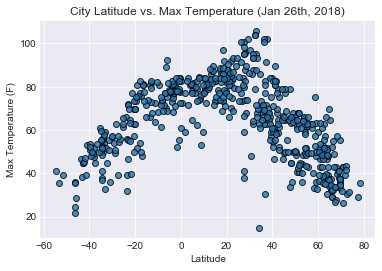

In [8]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Jan 26th, 2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.style.use('seaborn-dark')
plt.grid(True)

# Save the figure
plt.savefig("images/City_Lat vs Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

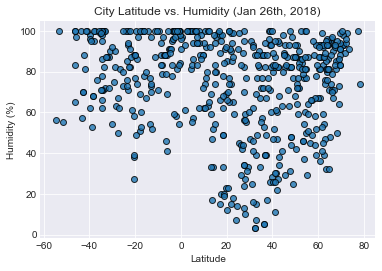

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Jan 26th, 2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.style.use('seaborn-dark')
plt.grid(True)

# Save the figure
plt.savefig("images/City_Lat vs Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

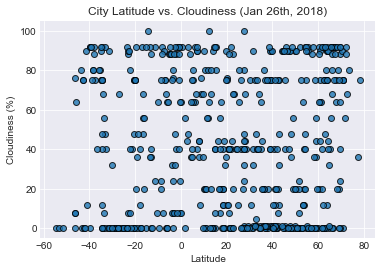

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Jan 26th, 2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.style.use('seaborn-dark')
plt.grid(True)

# Save the figure
plt.savefig("images/City_Lat vs Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

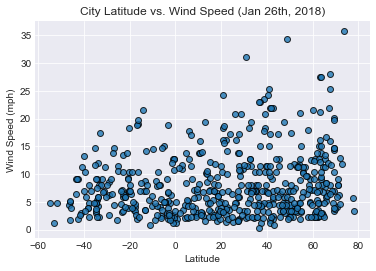

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Jan 26th, 2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.style.use('seaborn-dark')
plt.grid(True)

# Save the figure
plt.savefig("images/City_Lat vs Wind Speed.png")

# Show plot
plt.show()